<a href="https://colab.research.google.com/gist/esenthil2018/2128519b8d7b690e47a7639e9cad7a75/copy-of-end_to_end_implementation-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch tensorflow

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.



     ------------------------------------- 276.5/276.5 MB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.4 MB/s eta 0:00:00
     ------------------------------------- 440.8/440.8 kB 13.9 MB/s eta 0:00:00
     --------------------------------------- 14.9/14.9 MB 25.2 MB/s eta 0:00:00
     ------------------------------------- 430.5/430.5 kB 26.3 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 21.8 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 22.8 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 876.9 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 21.7 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 23.8 MB/s eta 0:00:00
     -------------------------------------- 181.4/

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import opendatasets as od
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [4]:
print(tf.__version__)

2.13.0


# Download data

In [7]:
data_url=("https://www.kaggle.com/datasets/puneet6060/intel-image-classification")

In [11]:
#od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yoanladini95600
Your Kaggle Key: ········


100%|██████████| 346M/346M [00:13<00:00, 27.0MB/s] 


# Explore data

In [16]:
import os
# Walk through pizza_steak directory and list number of files
print("Train data: ")
for dirpath, dirnames, filenames in os.walk("./intel-image-classification/seg_train/seg_train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Test data: ")
for dirpath, dirnames, filenames in os.walk("./intel-image-classification/seg_test/seg_test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Prediction data: ")
for dirpath, dirnames, filenames in os.walk("./intel-image-classification/seg_pred/seg_pred"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Train data: 
There are 6 directories and 0 images in './intel-image-classification/seg_train/seg_train'.
There are 0 directories and 2191 images in './intel-image-classification/seg_train/seg_train\buildings'.
There are 0 directories and 2271 images in './intel-image-classification/seg_train/seg_train\forest'.
There are 0 directories and 2404 images in './intel-image-classification/seg_train/seg_train\glacier'.
There are 0 directories and 2512 images in './intel-image-classification/seg_train/seg_train\mountain'.
There are 0 directories and 2274 images in './intel-image-classification/seg_train/seg_train\sea'.
There are 0 directories and 2382 images in './intel-image-classification/seg_train/seg_train\street'.
Test data: 
There are 6 directories and 0 images in './intel-image-classification/seg_test/seg_test'.
There are 0 directories and 437 images in './intel-image-classification/seg_test/seg_test\buildings'.
There are 0 directories and 474 images in './intel-image-classification/seg_

In [17]:
import random
import matplotlib.pyplot as plt
def view_random_image(target_dir, target_class):
  # We will view image from here
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape {img.shape}")

  return img

Image shape (150, 150, 3)


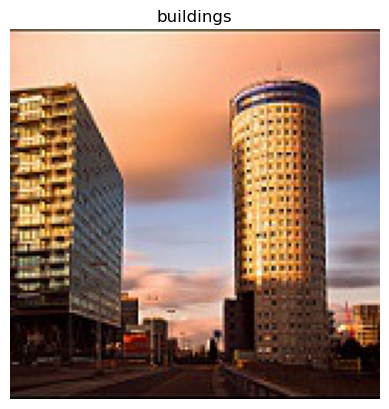

In [18]:
img = view_random_image(target_dir='./intel-image-classification/seg_train/seg_train/',
                  target_class='buildings')

In [19]:
# Get the class name programmatically
import pathlib
data_dir = pathlib.Path("./intel-image-classification/seg_train/seg_train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)


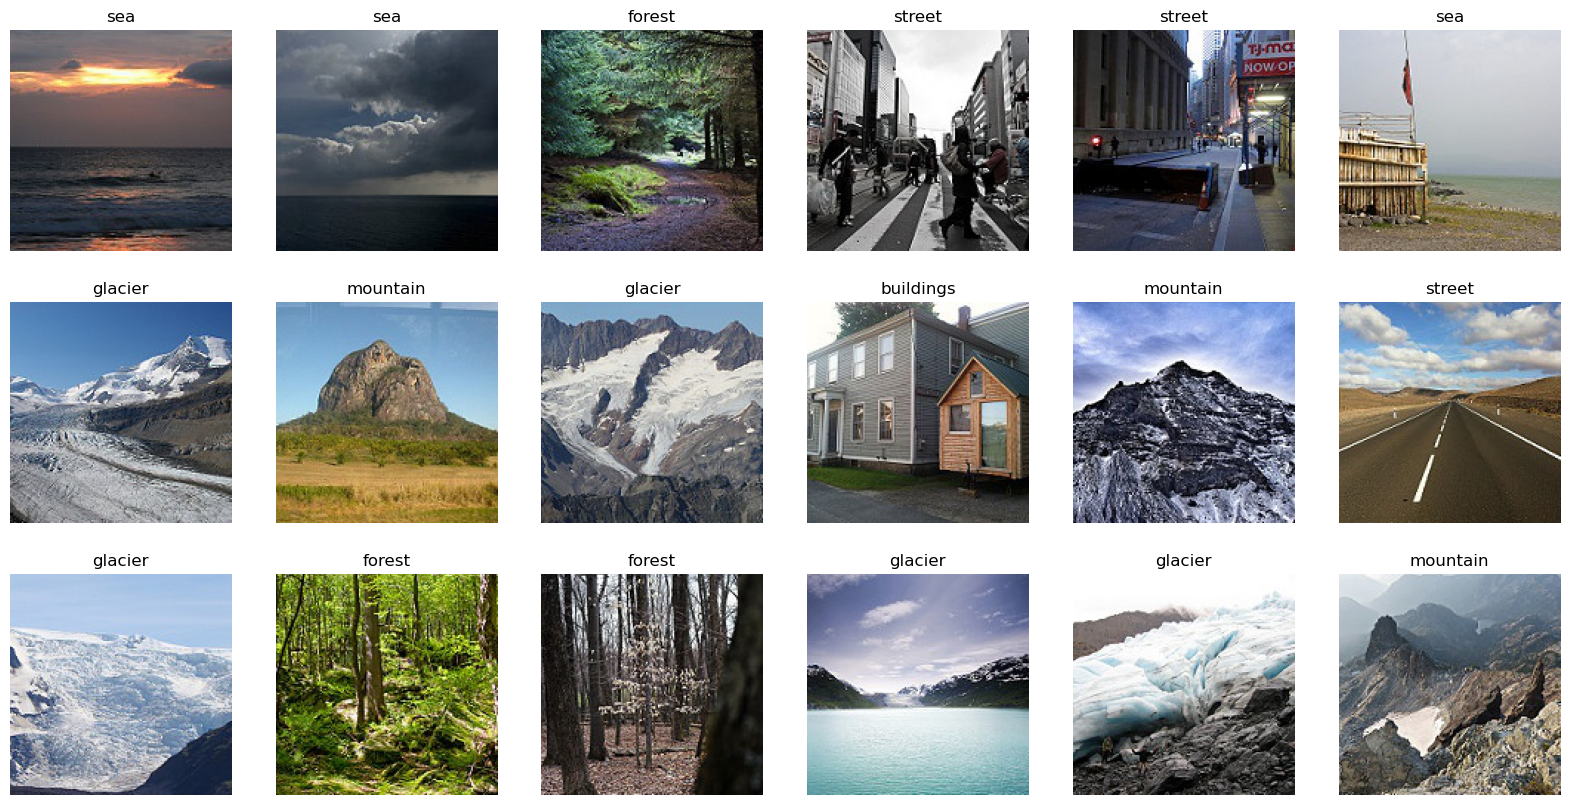

In [20]:
plt.figure(figsize=(20, 10))
for i in range(18):
  plt.subplot(3, 6, i+1)
  class_name = random.choice(class_names)
  img = view_random_image(target_dir='./intel-image-classification/seg_train/seg_train/',
                  target_class=class_name)

# Prepare data for model

In [23]:
train_dir = "./intel-image-classification/seg_train/seg_train/"
test_dir = "./intel-image-classification/seg_test/seg_test/"

In [34]:
# Create augmented data generator instance
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255.)

# Load data(data, label) from directory and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = val_datagen.flow_from_directory(test_dir,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Basic model Buildinig (CNN Classifier)

In [25]:
model_1 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3)),
  MaxPool2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(len(class_names), activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [26]:
history_1 = model_1.fit(train_data,
                    epochs=4,
                    batch_size=32,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/4
439/439 [==============================] - 171s 388ms/step - loss: 1.0430 - accuracy: 0.5954 - val_loss: 0.9536 - val_accuracy: 0.6483
Epoch 2/4
439/439 [==============================] - 100s 227ms/step - loss: 0.7867 - accuracy: 0.7044 - val_loss: 0.7600 - val_accuracy: 0.7273
Epoch 3/4
439/439 [==============================] - 99s 226ms/step - loss: 0.6756 - accuracy: 0.7502 - val_loss: 0.5393 - val_accuracy: 0.8037
Epoch 4/4
439/439 [==============================] - 99s 225ms/step - loss: 0.6148 - accuracy: 0.7735 - val_loss: 0.5504 - val_accuracy: 0.8020


In [27]:
model_1.evaluate(test_data)

94/94 [==============================] - 3s 36ms/step - loss: 0.5504 - accuracy: 0.8020


[0.5503954887390137, 0.8019999861717224]

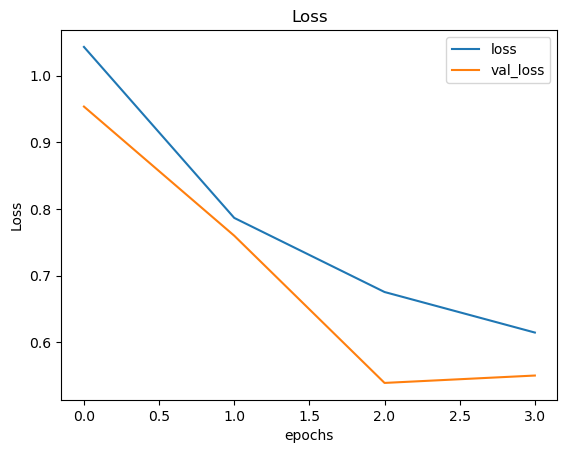

In [28]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

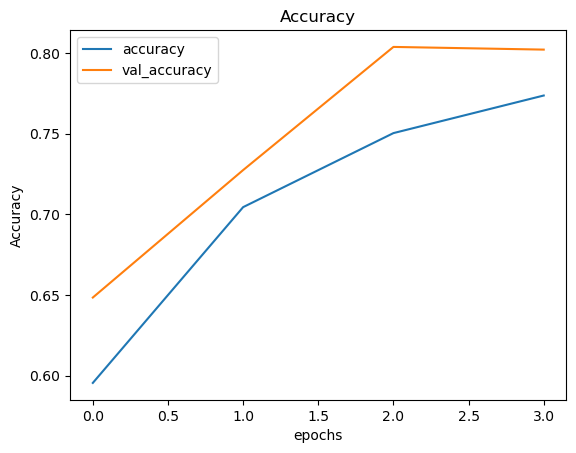

In [29]:
pd.DataFrame(history_1.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');

In [94]:
tf.keras.models.save_model(model_1, '/models/')

INFO:tensorflow:Assets written to: /models/assets


INFO:tensorflow:Assets written to: /models/assets


In [95]:
!dir -alrt models

 Le volume dans le lecteur D s’appelle Nouveau nom
 Le numéro de série du volume est 74BB-2D68

 Répertoire de D:\Données Jupiter\MLOPS_TEST


 Répertoire de D:\Données Jupiter\MLOPS_TEST\models

18/09/2023  12:34    <DIR>          .
18/09/2023  12:34    <DIR>          ..
18/09/2023  12:19    <DIR>          assets
18/09/2023  12:34                55 fingerprint.pb
18/09/2023  12:34            20 231 keras_metadata.pb
18/09/2023  12:34           159 496 saved_model.pb
18/09/2023  12:25    <DIR>          variables
               3 fichier(s)          179 782 octets
               4 Rép(s)  360 629 878 784 octets libres


Fichier introuvable


In [3]:
model_loaded = tf.keras.models.load_model('/models/')

In [98]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [99]:
from PIL import Image
import numpy as np
from skimage import transform
def process(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [112]:
def get_class_name(pred_label, class_names):

    pred_label_array = np.array(pred_label)

    indices = np.where(pred_label_array == 1)[1]

    if indices.size > 0:
        return class_names[indices[0]]
    else:
        return None

In [113]:
pred_label=model_loaded.predict(process('./intel-image-classification/alto-crew-Rv3ecImL4ak-unsplash.jpg'))
print(get_class_name(pred_label, class_names))

1/1 [==============================] - 0s 16ms/step
glacier


In [114]:
!zip -r models.zip models/

'zip' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.
